In [1]:
from astropy.io import fits

In [3]:
hdulist = fits.open('image0.fits')
hdulist.info()

Filename: image0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


In [8]:
data = hdulist[0].data

In [9]:
data.shape

(200, 200)

In [10]:
import matplotlib.pyplot as plt

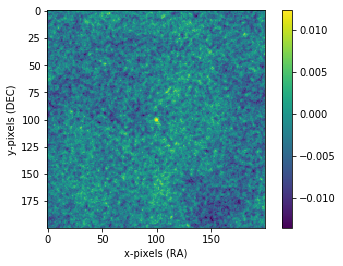

In [13]:
plt.imshow(data, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (DEC)')
plt.colorbar()
plt.show()

In [15]:
import numpy as np

In [16]:
np.argmax(data)

20100

In [17]:
np.unravel_index(np.argmax(data), data.shape)

(100, 100)

In [18]:
def load_fits(file_name):
    hdulist = fits.open(file_name)
    data = hdulist[0].data
    return np.unravel_index(np.argmax(data), data.shape)

In [19]:
load_fits('image0.fits')

(100, 100)

In [20]:
load_fits('image1.fits')

(101, 100)

In [21]:
load_fits('image2.fits')

(14, 125)

In [26]:
a = np.array([[1,2],[3,4]])
b = np.array([[3,6],[9,12]])
np.concatenate([a,b]).reshape(a.shape)

ValueError: cannot reshape array of size 8 into shape (2,2)

In [28]:
c = np.array([a,b])

In [32]:
np.mean(c, axis=0)

array([[2., 4.],
       [6., 8.]])

In [39]:
def mean_fits(files):
    stack = []
    for file in files:
        data = fits.open(file)[0].data
        stack.append(data)
    mean = np.mean(np.array(stack), axis=0)
    return mean

In [40]:
mean_fits(['image0.fits', 'image1.fits', 'image2.fits'])[100, 100]

0.017356586332122486

In [41]:
mean_fits(['image0.fits', 'image1.fits', 'image3.fits'])[100, 100]

0.01006323037048181

In [43]:
mean_fits(['image0.fits', 'image1.fits', 'image2.fits', 'image3.fits', 'image4.fits'])[100, 100]

0.014150320738554